In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('amazon.csv')


In [3]:
# Display the first few rows
print(df.head())

# Get information about data types and missing values
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [4]:
print(df.head())

print(df.info())

print(df.describe(include='all'))


   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1         ₹349                 43%  

In [5]:
df = df.drop_duplicates()


In [6]:
print(df.isnull().sum())

df = df.dropna(subset=['user_id', 'product_id'])

df['rating_count'].fillna(0, inplace=True)


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


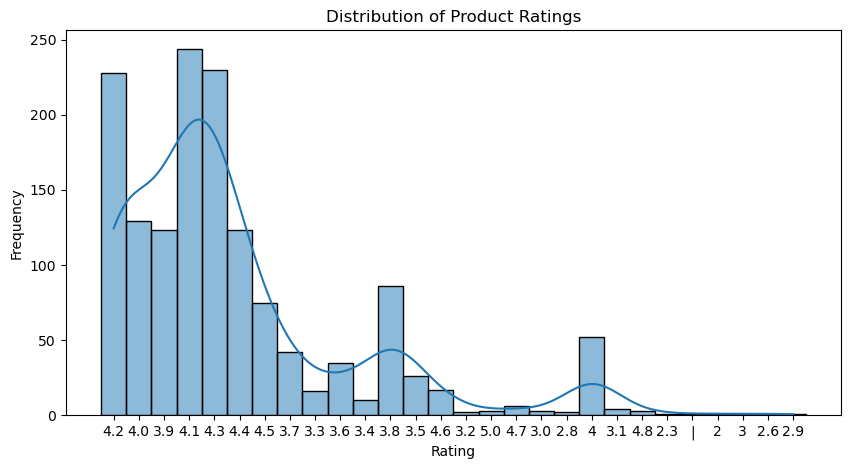

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


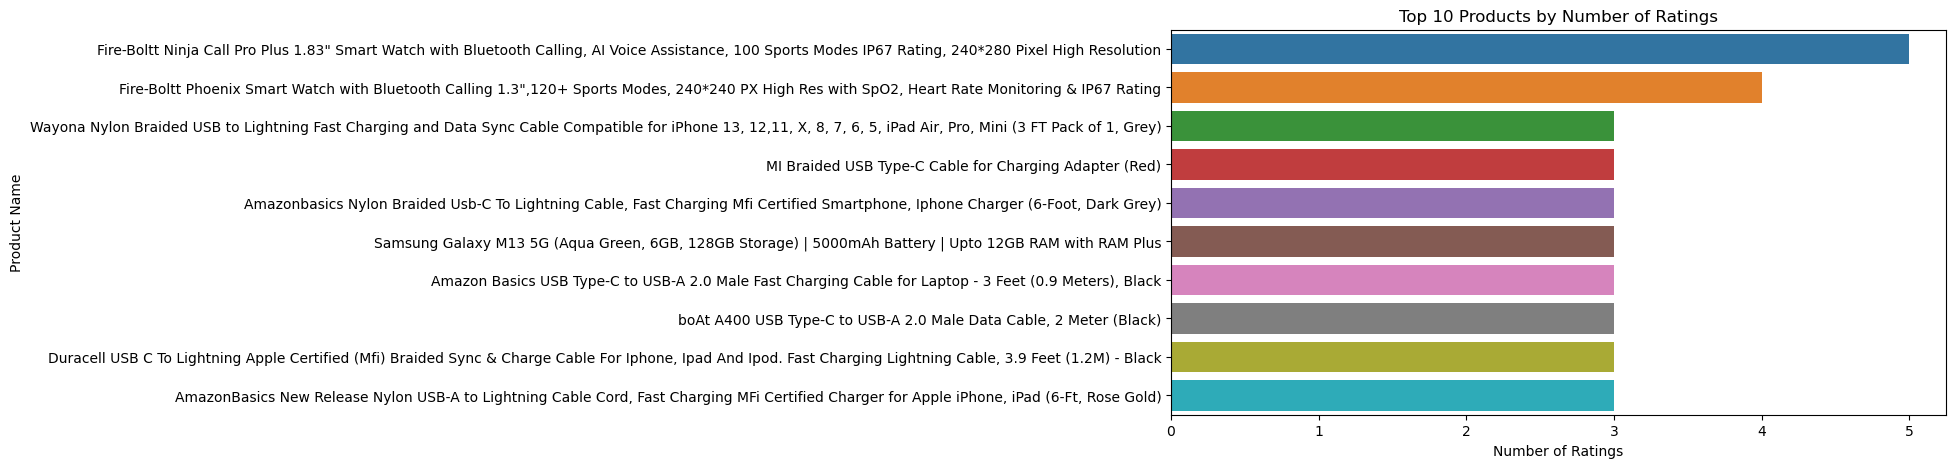

In [8]:
top_products = df['product_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Name')
plt.show()


In [9]:
print(df['rating'].unique())


['4.2' '4.0' '3.9' '4.1' '4.3' '4.4' '4.5' '3.7' '3.3' '3.6' '3.4' '3.8'
 '3.5' '4.6' '3.2' '5.0' '4.7' '3.0' '2.8' '4' '3.1' '4.8' '2.3' '|' '2'
 '3' '2.6' '2.9']


In [10]:
df = df[df['rating'].str.match(r'^\d+(\.\d+)?$')]

df['rating'] = df['rating'].astype(float)


In [11]:
print(df[['rating']].head())
print(df['rating'].unique())


   rating
0     4.2
1     4.0
2     3.9
3     4.2
4     4.2
[4.2 4.  3.9 4.1 4.3 4.4 4.5 3.7 3.3 3.6 3.4 3.8 3.5 4.6 3.2 5.  4.7 3.
 2.8 3.1 4.8 2.3 2.  2.6 2.9]


In [12]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
print(df[['discounted_price', 'actual_price', 'rating', 'rating_count']].head())


   discounted_price  actual_price  rating  rating_count
0             399.0        1099.0     4.2       24269.0
1             199.0         349.0     4.0       43994.0
2             199.0        1899.0     3.9        7928.0
3             329.0         699.0     4.2       94363.0
4             154.0         399.0     4.2       16905.0


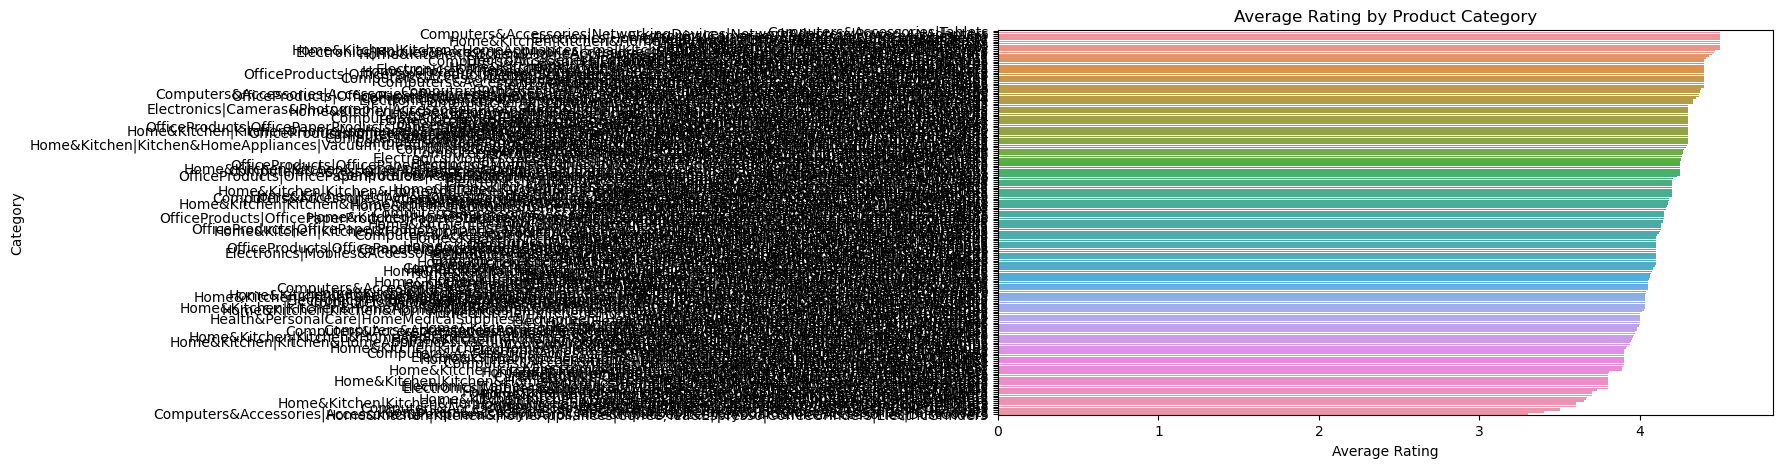

In [13]:
category_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_ratings.values, y=category_ratings.index)
plt.title('Average Rating by Product Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


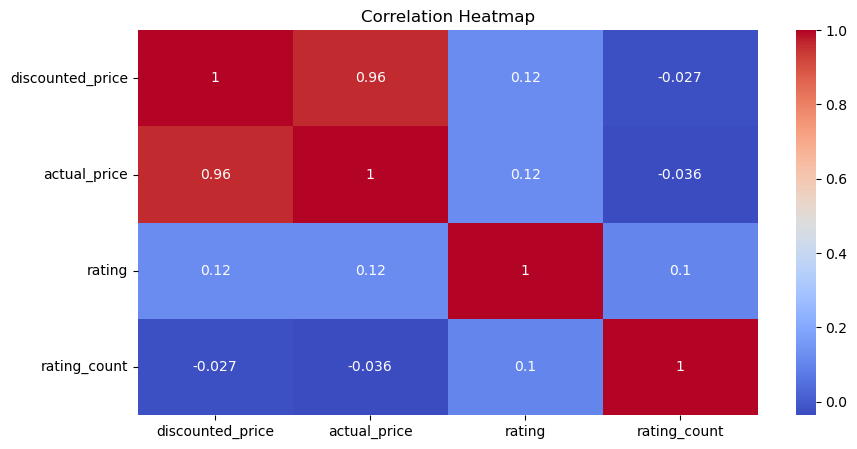

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(df[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [15]:
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='mean', fill_value=0)


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


In [18]:
import numpy as np

def predict_ratings(user_similarity, user_item_matrix):
    user_means = user_item_matrix.mean(axis=1).values.reshape(-1, 1)
    ratings_diff = user_item_matrix - user_means
    pred = user_means + user_similarity.dot(ratings_diff) / np.abs(user_similarity).sum(axis=1).reshape(-1, 1)
    return pred

user_pred = predict_ratings(user_similarity, user_item_matrix)


In [19]:
item_user_matrix = user_item_matrix.T

item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)


In [21]:
def predict_ratings_item(item_similarity, user_item_matrix):
    item_means = user_item_matrix.mean(axis=0).values.reshape(1, -1)
        ratings_diff = user_item_matrix - item_means
    
    pred = item_means + ratings_diff.dot(item_similarity) / np.abs(item_similarity).sum(axis=1).reshape(1, -1)
    
    return pred

item_pred = predict_ratings_item(item_similarity, user_item_matrix)


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(predictions, targets):
    return sqrt(mean_squared_error(predictions, targets))

user_pred_flat = user_pred.flatten()
item_pred_flat = item_pred.flatten()

user_actual = user_item_matrix.values.flatten()
item_actual = user_item_matrix.values.flatten()

user_rmse = rmse(user_pred_flat, user_actual)

item_rmse = rmse(item_pred_flat, item_actual)

print(f'User-User CF RMSE: {user_rmse}')
print(f'Item-Item CF RMSE: {item_rmse}')


AttributeError: 'DataFrame' object has no attribute 'flatten'